## Kaggle Python public API for data collection
### Documentation generation

### Imports

In [16]:
import kaggle
import pandas as pd
import numpy as np
import json
import os
from pathlib import Path

Checking the default download directory

In [2]:
ddir = kaggle.api.get_default_download_dir()
ddir

'c:\\Users\\dmasrour\\Documents\\NotebookCodeGen\\Scripts\\FirstStupidMethod_DocGen'

List 'getting started' competitions sorted by number of teams

In [2]:
competitions = pd.DataFrame(kaggle.api.competitions_list(category='gettingStarted', sort_by='numberOfTeams'), columns=['CompetitionName'])
competitions

,CompetitionName
0,titanic
1,house-prices-advanced-regression-techniques
2,spaceship-titanic
3,digit-recognizer
4,nlp-getting-started
5,word2vec-nlp-tutorial
6,store-sales-time-series-forecasting
7,connectx
8,data-science-london-scikit-learn
9,facial-keypoints-detection


List first 10 most voted notebooks from competitions retreived above

In [3]:
comp_nb = {}
for c in competitions['CompetitionName']:
    # print(c)
    try:
        notebooks = kaggle.api.kernels_list(page_size=10, competition=str(c), kernel_type='notebook', sort_by='voteCount')
        comp_nb[c] = notebooks
    except Exception as e:
        print('Kaggle API exception : Notebook not found')

In [4]:
comp_nb

{titanic: [Titanic Data Science Solutions,
  Titanic Tutorial,
  Introduction to Ensembling/Stacking in Python,
  A Data Science Framework: To Achieve 99% Accuracy,
  Titanic Top 4% with ensemble modeling,
  EDA To Prediction(DieTanic),
  Titanic - Advanced Feature Engineering Tutorial,
  A Journey through Titanic,
  A Statistical Analysis & ML workflow of Titanic,
  Titanic Survival Predictions (Beginner)],
 house-prices-advanced-regression-techniques: [Comprehensive data exploration with Python,
  Stacked Regressions : Top 4% on LeaderBoard,
  Regularized Linear Models,
  Submitting From A Kernel,
  Handling Missing Values,
  XGBoost,
  A study on Regression applied to the Ames dataset,
  How I made top 0.3% on a Kaggle competition,
  Using Categorical Data with One Hot Encoding,
  Selecting and Filtering in Pandas],
 spaceship-titanic: [🚀Spaceship Titanic -📊EDA + 27 different models📈,
  🚀 Spaceship Titanic: A complete guide 🏆,
  All Imputation Techniques with Pros and Cons,
  🚀🚀[Ten

Pull notebooks (Run once!)

In [81]:
length = 0
for c in comp_nb:
    for n in comp_nb[c]:
        try:
            nb = kaggle.api.kernels_pull(n.ref, 'C:\\Users\\dmasrour\\Documents\\NotebookCodeGen\\Data\\Unprocessed_Notebooks')
        except Exception as e:
            print('Kaggle API exception : Notebook not found')
print('DONE')

DONE


#### Let's study our notebooks. 

Computing the average number of cells

In [8]:
directory = 'C:\\Users\\dmasrour\\Documents\\NotebookCodeGen\\Data\\Unprocessed_Notebooks'
files = list(Path(directory).glob('*'))
file_count = len(list(files))
file_count

137

In [29]:
cell_count = 0
cell_count_array = np.empty([1,])
temp = []
for file in files:
    with open(file, 'r', encoding='utf-8') as nb:    
        notebook = json.load(nb) # read JSON file from path (this is a dict)

    temp.append(len(notebook['cells']))
    cell_count += len(notebook['cells'])

cell_count_array = np.array(temp)
print(' Average # of cells ', cell_count/file_count, '\n', 'Std of # of cells' , np.std(cell_count_array), '\n', 'Median of # of cells' , np.median(cell_count_array))

 Average # of cells  52.56204379562044 
 Std of # of cells 44.323275148735235 
 Median of # of cells 39.0


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

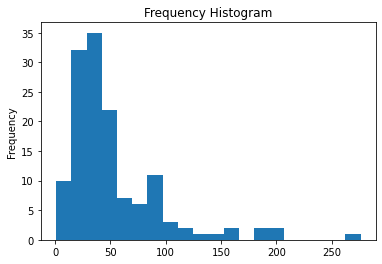

In [28]:
from turtle import width
import matplotlib.pyplot as plt

plt.hist(cell_count_array, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')